Enter a movie name: shawshank
1 -  "The Gym" Shawshank (2008)
2 -  "Dating with Corey" Shawshank (2016)
3 -  The Shawshank Redemption (1994)
4 -  Shawshank: The Redeeming Feature (2001) (TV)
5 -  "Trailer Trash" Shawshank Redemption (2011)
6 -  "Dating a Puppet" Shawshank Redemption (2013)
7 -  "Markiplier" SHAWSHANK RE-DUMB-TION (i'm so sorry...) - Escaping the Prison (2015)
8 -  The Shawshank Redemption: Behind the Scenes (2004) (V)
9 -  Roman Tomes: Shawshank (2018) (V)
10 -  "Ghost Hunters Academy" Schooled at Shawshank (2010)
11 -  "Mysteries of the Abandoned" The Real Shawshank (2018)
12 -  "Entertainment Pix" Shawshank Hustle (2016)
13 -  "Honest Trailers" The Shawshank Redemption (2021)
14 -  "Filtered Water" This is Not the Shawshank Redemption (2019)
15 -  "The Girl Whisperer" Redemption of Shawshank (2016)
16 -  "Beyond the Blockbusters" The Shawshank Redemption (2020)
17 -  "The Tragedy Academy" The Shawshank Apprehension (2020)
18 -  "Lost in Adaptation" The Shawshank Rede

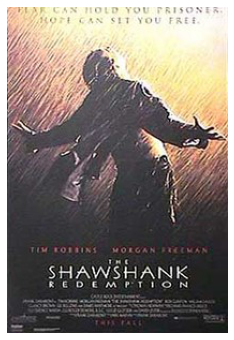


Cast:

Tim Robbins  as  Andy Dufresne


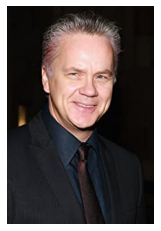

Morgan Freeman  as  Ellis Boyd 'Red' Redding


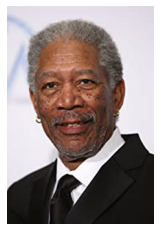

Bob Gunton  as  Warden Norton


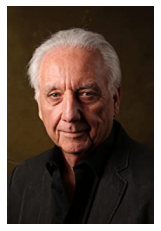

William Sadler  as  Heywood


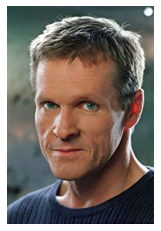

Clancy Brown  as  Captain Hadley


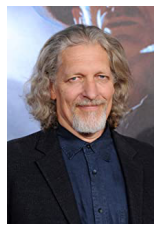

In [1]:
from imdb import IMDb
from rotten_tomatoes_client import RottenTomatoesClient as rt
import requests
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt


# create an instance of the IMDb class
ia = IMDb()

movie_name = input("Enter a movie name: ")

movies = ia.search_movie(movie_name)
for i, m in enumerate(movies):
    print(i + 1, "- ", m["long imdb title"])

movie_index = int(input("Which movie do you want? ")) - 1

movie_id = movies[movie_index].movieID
the_movie = ia.get_movie(movie_id)

try:
    runtime = int(the_movie["runtimes"][0])
except:
    runtime = 0
try:
    meta_score = ia.get_movie_critic_reviews(movie_id)["data"]["metascore"]
except:
     meta_score = 'unknown'

try:
    parent_guide = ia.get_movie_parents_guide(movie_id)["data"]["mpaa"]
except:
    try:
        parent_guide = str(ia.get_movie_parents_guide(movie_id)["data"]['certification'])
        start = parent_guide.find('United Kingdom') + 15
        end = start + 2
        parent_guide = '+' + parent_guide[start:end]
    except:
        parent_guide = 'unknown'

print("\n\nYou choosed: ", movies[movie_index]["long imdb title"])

print('\n--------------- IMDB ---------------')

print("Rating: {}\nVotes: {}\nMetacritic: {}\nRuntime: {} H {} Mins\nGenres: {}\nLanguages: {}\nCountries: {}".format(
        the_movie["rating"],
        f'{the_movie["votes"]:,}',
        meta_score,
        runtime // 60,
        runtime % 60,
        ", ".join(the_movie["genres"]),
        ", ".join(the_movie["languages"]),
        ", ".join(the_movie["countries"])
    )
)

print("Parents guide: ", parent_guide)


print('\n--------------- Rotten Tomatoes ---------------')

year = the_movie["year"]
rotten = rt.search(movie_name.lower())

imdb_cast = [the_movie["cast"][i]['name'] for i in range(len(the_movie["cast"]))]
rotten_cast = []

for i in range(len(rotten["movies"])):
    if year - 1 <= rotten["movies"][i]["year"] <= year + 1:
        for j in range(len(rotten["movies"][i]['castItems'])):
            rotten_cast.append(rotten["movies"][i]['castItems'][j]['name'])
        
        if len(set(rotten_cast).intersection(set(imdb_cast))) > 0:
            url = "https://www.rottentomatoes.com" + rotten["movies"][i]["url"]
            break
    rotten_cast = []

try:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    data = json.loads(list(soup.find(id="score-details-json").children)[0])
    critics_score = data['modal']['tomatometerScoreAll']
    aud_score = data["modal"]["audienceScoreVerified"]
    if data["modal"]["audienceScoreVerified"]['averageRating'] is None:
        aud_score = data["modal"]['audienceScoreAll']
except:
    print('Rotten Tomatos Score unavailable')



try:
    print("Critics Score: ", critics_score["score"], "%")
except: 
    pass
try:
    print("Critics Count: ", f'{critics_score["ratingCount"]:,}')
except: 
    pass
try:
    print("Critics Fresh: ", f'{critics_score["likedCount"]:,}')
except: 
    pass
try:
    print("Critics Rotten: ", f'{critics_score["notLikedCount"]:,}')
except: 
    pass
try:
    print("Critics Sentiment: ", critics_score["tomatometerState"].title(), '\n')
except: 
    pass


try:
    print("Audience Score: ", aud_score["score"], "%")
except: 
    pass
try:
    print("Audience Count: ", f'{aud_score["ratingCount"]:,}')
except: 
    pass
try:
    print("Audience Likes: ", f'{aud_score["likedCount"]:,}')
except: 
    pass
try:
    print("Audience Dislikes: ", f'{aud_score["notLikedCount"]:,}')
except: 
    pass
try:
    print("Audience Sentiment: ", aud_score["scoreSentiment"])
except: 
    pass    

## uncomment this section if you only want to show cast names without their pictures
# print("\nCast: ", end="")
# for i in range(5):
#     try:
#         print("\t", the_movie["cast"][i]["name"], ' as ', the_movie["cast"][i].currentRole['name'])
#     except:
#         pass

print("\nDirector:", the_movie["director"][0]["name"])
print("Writer:  ", the_movie["writer"][0]["name"])
print("\nPlot: \n", str(the_movie["plot"]).split("::")[0].split("[")[1].replace("'", "").replace('"', ""))
print('\n')

oscar_win = []
oscar_nominee = []
golden_win = []
golden_nominee = []
bafta_win = []
bafta_nominee = []

try:
    rewards_all = ia.get_movie_awards(movie_id)['data']['awards']

    for i in range(len(rewards_all)):
        if rewards_all[i]['award'] == 'Oscar':
            if rewards_all[i]['result'] == 'Winner':
                oscar_win.append(rewards_all[i])
            elif rewards_all[i]['result'] == 'Nominee':
                oscar_nominee.append(rewards_all[i])
                
        elif rewards_all[i]['award'] == 'Golden Globe':
            if rewards_all[i]['result'] == 'Winner':
                golden_win.append(rewards_all[i])
            elif rewards_all[i]['result'] == 'Nominee':
                golden_nominee.append(rewards_all[i])
                
        elif rewards_all[i]['award'] == 'BAFTA Film Award':
            if rewards_all[i]['result'] == 'Winner':
                bafta_win.append(rewards_all[i])
            elif rewards_all[i]['result'] == 'Nominee':
                bafta_nominee.append(rewards_all[i])
except:
    rewards_all = []


print("Oscar Wins:\t")
for win in oscar_win:
    print(win["notes"], ": ", end="")
    for i in range(len(win["to"])):
        print(win["to"][i], end="")
        if i != len(win["to"]) - 1:
            print(", ", end='')
        else:
            print(".")
print("\n")

print("Oscar Nominees:\t")
for nominee in oscar_nominee:
    print(nominee["notes"], ": ", end="")
    for i in range(len(nominee["to"])):
        print(nominee["to"][i], end="")
        if i != len(nominee["to"]) - 1:
            print(", ", end='')
        else:
            print(".")
print("\n")


print("Golden Globe Wins:\t")
for win in golden_win:
    print(win["notes"], ": ", end="")
    for i in range(len(win["to"])):
        print(win["to"][i], end="")
        if i != len(win["to"]) - 1:
            print(", ", end='')
        else:
            print(".")
print("\n")

print("Golden Globe Nominees:\t")
for nominee in golden_nominee:
    print(nominee["notes"], ": ", end="")
    for i in range(len(nominee["to"])):
        print(nominee["to"][i], end="")
        if i != len(nominee["to"]) - 1:
            print(", ", end='')
        else:
            print(".")
print("\n")


print("BAFTA Globe Wins:\t")
for win in bafta_win:
    print(win["notes"], ": ", end="")
    for i in range(len(win["to"])):
        print(win["to"][i], end="")
        if i != len(win["to"]) - 1:
            print(", ", end='')
        else:
            print(".")
print("\n")


print("BAFTA Globe Nominees:\t")
for nominee in bafta_nominee:
    print(nominee["notes"], ": ", end="")
    for i in range(len(nominee["to"])):
        print(nominee["to"][i], end="")
        if i != len(nominee["to"]) - 1:
            print(", ", end='')
        else:
            print(".")
print("\n")


first_image_url = the_movie["cover url"]
r = requests.get(first_image_url)
i = Image.open(BytesIO(r.content))
try:
    img_url = soup.find(class_="posterImage js-lazyLoad")['data-src']
except:
    img_url = ''

if len(img_url) > 0:
    r_img = requests.get(img_url)
    img = Image.open(BytesIO(r_img.content))
    #display(img)
    
    plt.figure(figsize=(10,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    plt.imshow(i)
    plt.axis('off')
    plt.show()


# comment this section if you only want to show cast names without their pictures
print('\nCast:\n')
for j in range(5):
    try:
        img = ia.get_person(the_movie['cast'][j].personID, 'main')['headshot']
        r = requests.get(img)
        i = Image.open(BytesIO(r.content))
        print(the_movie["cast"][j]["name"], ' as ', the_movie["cast"][j].currentRole['name'])
        plt.figure(figsize=(4,4))
        plt.imshow(i)
        plt.axis('off')
        plt.show()
    except:
        continue

